In [13]:
library(tidyverse)
library(fable)
library(tsibble)
library(readxl)
library(ggplot2)

In [4]:
df <- read_csv("city_temperature.csv")
df

Rows: 2906327 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): Region, Country, State, City
dbl (4): Month, Day, Year, AvgTemperature

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Region,Country,State,City,Month,Day,Year,AvgTemperature
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,Algeria,NA,Algiers,1,1,1995,64.2
Africa,Algeria,NA,Algiers,1,2,1995,49.4
Africa,Algeria,NA,Algiers,1,3,1995,48.8
Africa,Algeria,NA,Algiers,1,4,1995,46.4
Africa,Algeria,NA,Algiers,1,5,1995,47.9
Africa,Algeria,NA,Algiers,1,6,1995,48.7
Africa,Algeria,NA,Algiers,1,7,1995,48.9
Africa,Algeria,NA,Algiers,1,8,1995,49.1
Africa,Algeria,NA,Algiers,1,9,1995,49.0


In [5]:
str(df)

spc_tbl_ [2,906,327 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Region        : chr [1:2906327] "Africa" "Africa" "Africa" "Africa" ...
 $ Country       : chr [1:2906327] "Algeria" "Algeria" "Algeria" "Algeria" ...
 $ State         : chr [1:2906327] NA NA NA NA ...
 $ City          : chr [1:2906327] "Algiers" "Algiers" "Algiers" "Algiers" ...
 $ Month         : num [1:2906327] 1 1 1 1 1 1 1 1 1 1 ...
 $ Day           : num [1:2906327] 1 2 3 4 5 6 7 8 9 10 ...
 $ Year          : num [1:2906327] 1995 1995 1995 1995 1995 ...
 $ AvgTemperature: num [1:2906327] 64.2 49.4 48.8 46.4 47.9 48.7 48.9 49.1 49 51.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   Region = col_character(),
  ..   Country = col_character(),
  ..   State = col_character(),
  ..   City = col_character(),
  ..   Month = col_double(),
  ..   Day = col_double(),
  ..   Year = col_double(),
  ..   AvgTemperature = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [11]:
# Reemplazando datos nulos en 'Desconocido' para poder seguir utilizando esos datos, pero sin saber de que estado provienen
df$State <- ifelse(is.na(df$State), "Desconocido", df$State)

In [12]:
df

Region,Country,State,City,Month,Day,Year,AvgTemperature
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,Algeria,Desconocido,Algiers,1,1,1995,64.2
Africa,Algeria,Desconocido,Algiers,1,2,1995,49.4
Africa,Algeria,Desconocido,Algiers,1,3,1995,48.8
Africa,Algeria,Desconocido,Algiers,1,4,1995,46.4
Africa,Algeria,Desconocido,Algiers,1,5,1995,47.9
Africa,Algeria,Desconocido,Algiers,1,6,1995,48.7
Africa,Algeria,Desconocido,Algiers,1,7,1995,48.9
Africa,Algeria,Desconocido,Algiers,1,8,1995,49.1
Africa,Algeria,Desconocido,Algiers,1,9,1995,49.0


In [15]:
df %>%
  autoplot(AvgTemperature) + 
  labs(y = "Temperatura", title = "Comportamiento de la temperatura a lo largo de los años en todo el mundo")

ERROR: [1m[33mError[39m in `autoplot()`:[22m
[1m[22m[33m![39m Objects of class [34m<spec_tbl_df>[39m are not supported by autoplot.
[36mi[39m have you loaded the required package?


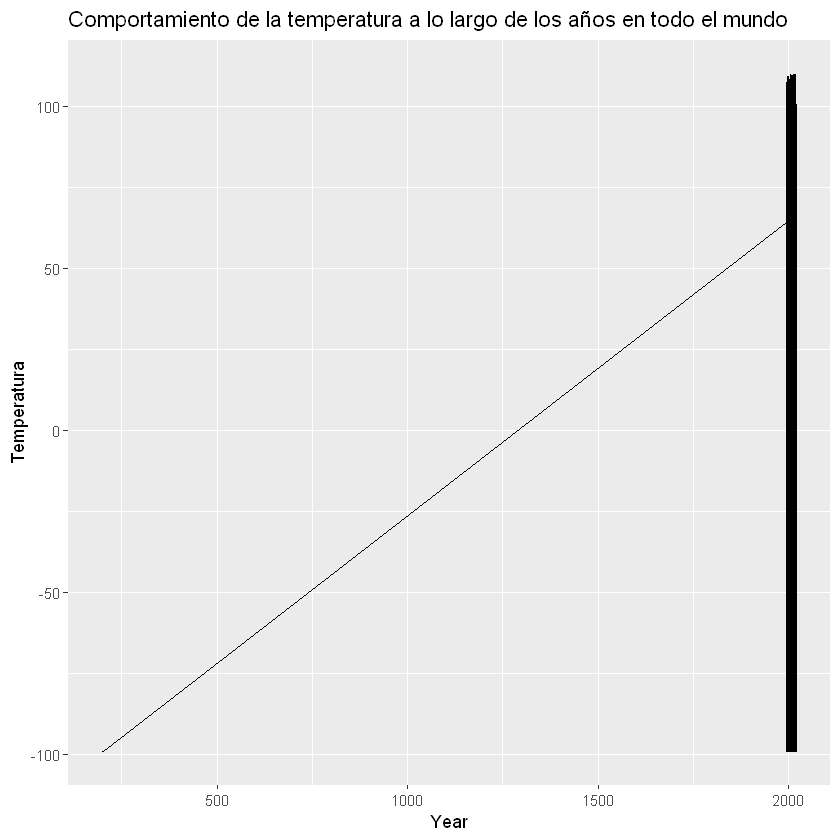

In [17]:
df %>%
  ggplot(aes(x = Year, y = AvgTemperature)) +
  geom_line() +
  labs(y = "Temperatura", title = "Comportamiento de la temperatura a lo largo de los años en todo el mundo")